In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.svm import SVR
os.chdir(r"C:\Users\User\OneDrive\Документы\Kaggle\Russian Car Plates Prices Prediction")
from supplemental_russian import REGION_CODES, GOVERNMENT_CODES


In [2]:
def smape(estimator, X, y):
    return 100 / len(y) * sum(abs(y - estimator.predict(X)) / (abs(y) + abs(estimator.predict(X))) * 2)

In [3]:
def convert_dates(data):
    data["date"] = pd.to_datetime(data["date"])
    data["year"] = data["date"].dt.year.astype(str)
    data["month"] = data["date"].dt.month.map(
        {
            1: "january",
            2: "february",
            3: "march",
            4: "april",
            5: "may",
            6: "june",
            7: "july",
            8: "august",
            9: "september",
            10: "october",
            11: "november",
            12: "december"
        }
    )
    data["day_week"] = data["date"].dt.dayofweek.map(
        {
            0: "monday",
            1: "tuesday",
            2: "wednesday",
            3: "thursday",
            4: "friday",
            5: "saturday",
            6: "sunday"
        }
    )
    return data
    

In [4]:
def reverse_codes(REGION_CODES):
    dict = {}
    for v, k in REGION_CODES.items():
        for key in k:
            dict[key] = v
    return dict
regions = reverse_codes(REGION_CODES)

In [5]:
def extract_government_info(row):
    for ident, info in GOVERNMENT_CODES.items():
        if (row["letters"] == ident[0]) and (ident[1][0] <= int(row["numbers"]) <= ident[1][1]) and (row["region"] == ident[2]):
            return info[0], info[1], info[2], info[3]
        
    return "not governmental", 0, 0, 0

In [6]:
def extract_plate_info(data):
    data[["dept_name", "forb_buy", "adv_road", "significance"]] = data[["letters", "numbers", "region"]].apply(extract_government_info, axis=1, result_type="expand")
    data["region"] = data["region"].map(regions)
    return data

In [7]:
def wrangle(path):
    data = pd.read_csv(path)
    convert_dates(data)
    extract_plate(data)
    extract_plate_info(data)
    return data

In [8]:
def extract_plate(data):
    data["letters"] = data["plate"].str[0] + data["plate"].str[4: 6]
    data["numbers"] = data["plate"].str[1: 4]
    data["region"] = data["plate"].str[6:]
    return data

In [9]:
import pickle
def dump(estimator, name):
    with open(f"{name}.pkl", "wb") as f:
        pickle.dump(estimator, f)

In [10]:
def load(name):
    with open(f"{name}.pkl", "rb") as f:
        return pickle.load(f)

In [11]:
df = wrangle("train.csv")
df

,id,plate,date,price,year,month,day_week,letters,numbers,region,dept_name,forb_buy,adv_road,significance
0,1,X059CP797,2024-12-26 00:00:00,65000,2024,december,thursday,XCP,059,Москва,not governmental,0,0,0
1,2,Y800MH790,2024-07-12 21:31:37,100000,2024,july,friday,YMH,800,Московская область,not governmental,0,0,0
2,3,A212TX77,2024-04-18 00:00:00,290000,2024,april,thursday,ATX,212,Москва,not governmental,0,0,0
3,4,P001AY199,2025-01-03 00:27:15,680000,2025,january,friday,PAY,001,Москва,not governmental,0,0,0
4,5,P001AY199,2025-01-10 09:32:41,750000,2025,january,friday,PAY,001,Москва,not governmental,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51630,51631,X023PP797,2025-01-29 00:00:00,70000,2025,january,wednesday,XPP,023,Москва,not governmental,0,0,0
51631,51632,M004KA161,2025-01-31 00:00:00,1600000,2025,january,friday,MKA,004,Ростовская область,not governmental,0,0,0
51632,51633,E888EB199,2025-02-06 00:00:00,850000,2025,february,thursday,EEB,888,Москва,not governmental,0,0,0
51633,51634,X023XK77,2024-04-24 11:30:07,150000,2024,april,wednesday,XXK,023,Москва,not governmental,0,0,0


In [466]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51635 entries, 0 to 51634
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            51635 non-null  int64         
 1   plate         51635 non-null  object        
 2   date          51635 non-null  datetime64[ns]
 3   price         51635 non-null  int64         
 4   year          51635 non-null  object        
 5   month         51635 non-null  object        
 6   day_week      51635 non-null  object        
 7   letters       51635 non-null  object        
 8   numbers       51635 non-null  object        
 9   region        51635 non-null  object        
 10  dept_name     51635 non-null  object        
 11  forb_buy      51635 non-null  int64         
 12  adv_road      51635 non-null  int64         
 13  significance  51635 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(8)
memory usage: 5.5+ MB


In [566]:
df["year"].unique()

array(['2024', '2025', '2022', '2021', '2023'], dtype=object)

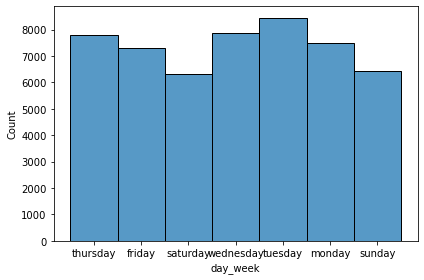

In [18]:
sns.histplot(df["day_week"])
plt.tight_layout()

<AxesSubplot:xlabel='year'>

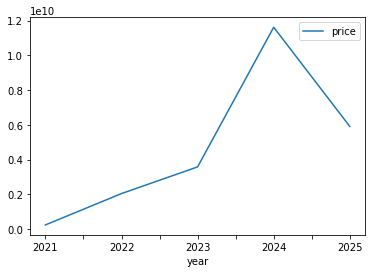

In [19]:
df.groupby("year").agg({"price": "sum"}).plot()

Text(0.5, 1.0, 'Total value sold by month')

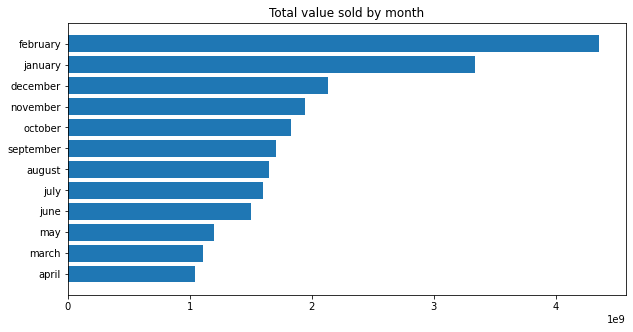

In [20]:
sorted_month = df.groupby("month").agg({"price": "sum"}).reset_index().sort_values("price", ascending=True)
fig, ax = plt.subplots(figsize=(10, 5))
plt.barh(width=sorted_month["price"], y=sorted_month["month"])
plt.title("Total value sold by month")

In [101]:
duplicated_plates = df[df["plate"].duplicated(keep=False)]
duplicated_plates

,id,plate,date,price,year,month,day_week
3,4,P001AY199,2025-01-03 00:27:15,680000,2025,january,friday
4,5,P001AY199,2025-01-10 09:32:41,750000,2025,january,friday
20,21,K063KK190,2023-07-30 12:07:31,530000,2023,july,sunday
21,22,K063KK190,2024-10-01 00:00:00,450000,2024,october,tuesday
32,33,M313MM99,2024-06-30 00:00:00,3250000,2024,june,sunday
...,...,...,...,...,...,...,...
51594,51595,C300KA977,2024-10-05 23:58:47,160000,2024,october,saturday
51595,51596,C300KA977,2024-11-17 12:40:59,150000,2024,november,sunday
51596,51597,C300KA977,2025-01-04 11:39:20,100000,2025,january,saturday
51629,51630,X023PP797,2024-03-25 10:38:34,155000,2024,march,monday


<AxesSubplot:>

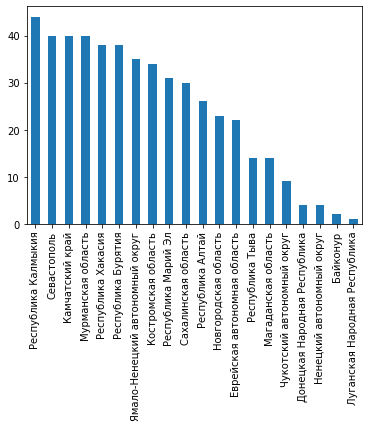

In [21]:
df["region"].value_counts().tail(20).plot(kind="bar")

<AxesSubplot:>

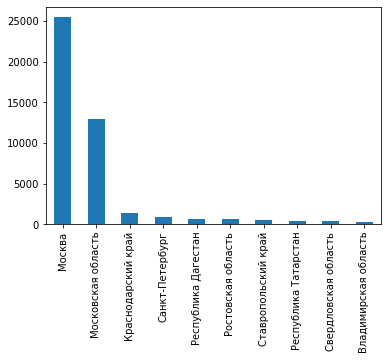

In [22]:
df["region"].value_counts().head(10).plot(kind="bar")

C:\Users\User\AppData\Local\Temp\ipykernel_8976\3772020368.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(df[df["region"] == "Москва"][df["price"] < df["price"].quantile(q=0.9)]["price"]);


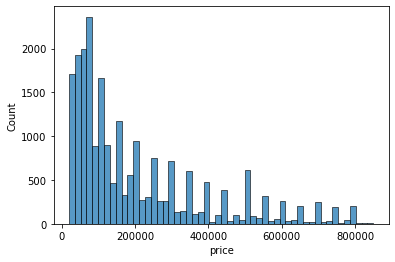

In [23]:
sns.histplot(df[df["region"] == "Москва"][df["price"] < df["price"].quantile(q=0.9)]["price"]);

C:\Users\User\AppData\Local\Temp\ipykernel_8976\3278779272.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(df[df["region"] == "Владимирская область"][df["price"] < df["price"].quantile(q=0.9)]["price"]);


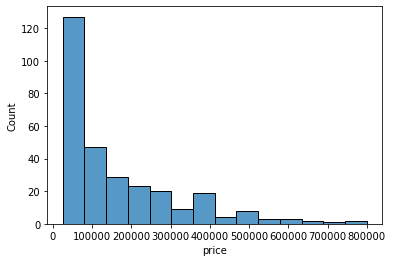

In [24]:
sns.histplot(df[df["region"] == "Владимирская область"][df["price"] < df["price"].quantile(q=0.9)]["price"]);

In [438]:
df["dept_name"].nunique()

60

In [25]:
df[df["dept_name"] == "Редкие блатные номера"]

,id,plate,date,price,year,month,day_week,letters,numbers,region,dept_name,forb_buy,adv_road,significance
15708,15709,T113TT04,2023-12-14,500000,2023,december,thursday,TTT,113,Республика Алтай,Редкие блатные номера,0,0,2


<AxesSubplot:>

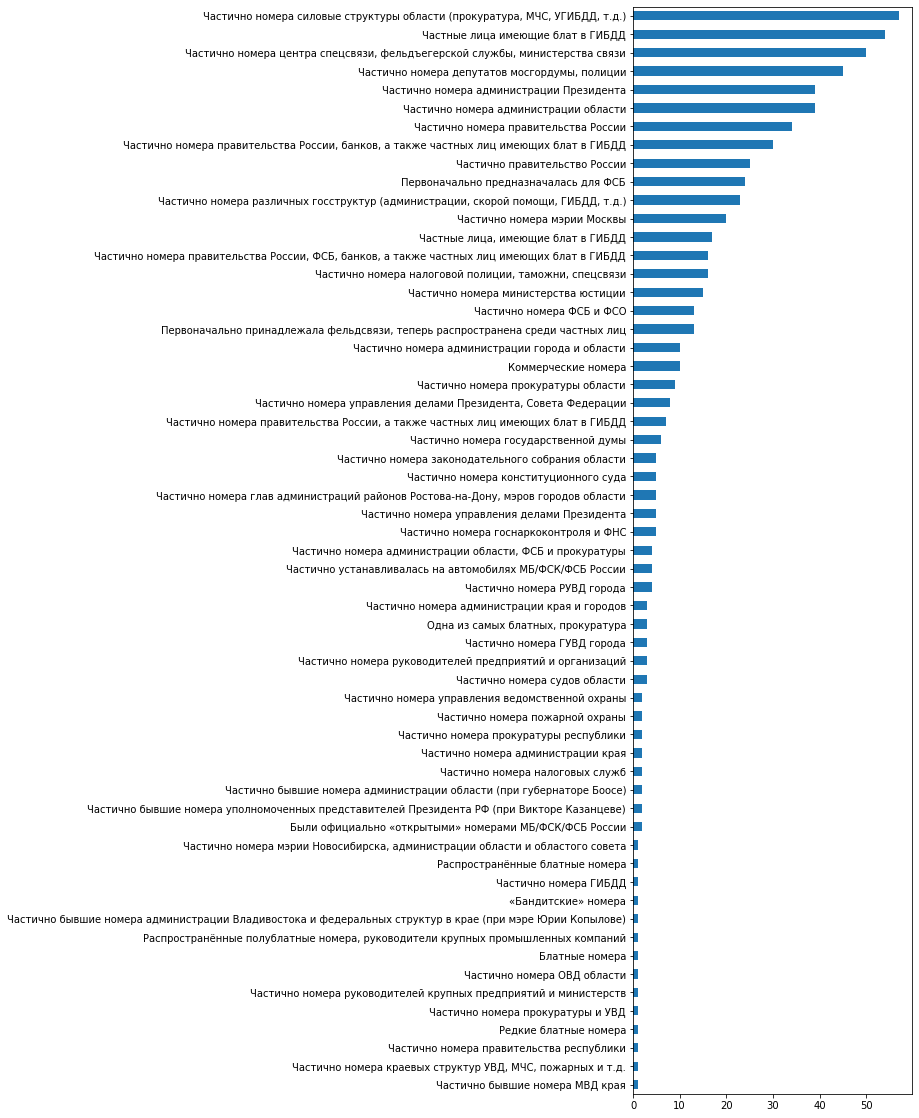

In [26]:
fig, ax = plt.subplots(figsize=(5, 20))
df["dept_name"].value_counts(sort=True, ascending=True).drop("not governmental").plot(kind="barh")

In [484]:
df["numbers_contribution"] = df.groupby("numbers")["price"].transform("mean")

In [485]:
df["letters_contribution"] = df.groupby("letters")["price"].transform("mean")

In [486]:
df.sort_values("numbers_contribution", ascending=False).head(10)

,id,plate,date,price,year,month,day_week,letters,numbers,region,dept_name,forb_buy,adv_road,significance,letters_contribution,numbers_contribution
35000,35001,O293OO77,2023-06-01,760000,2023,june,thursday,OOO,293,Москва,Первоначально предназначалась для ФСБ,0,0,1,1.446238e+06,6.042083e+06
2479,2480,O293OO161,2024-11-17,400000,2024,november,sunday,OOO,293,Ростовская область,not governmental,0,0,0,1.446238e+06,6.042083e+06
15790,15791,K293TO797,2024-11-27,70000,2024,november,wednesday,KTO,293,Москва,not governmental,0,0,0,2.010526e+05,6.042083e+06
26853,26854,M293MK07,2024-10-23,50000,2024,october,wednesday,MMK,293,Кабардино-Балкарская Республика,not governmental,0,0,0,2.080000e+05,6.042083e+06
39534,39535,X293AM797,2023-01-19,300000,2023,january,thursday,XAM,293,Москва,not governmental,0,0,0,6.816381e+05,6.042083e+06
6982,6983,X293XX50,2025-01-13,600000,2025,january,monday,XXX,293,Московская область,not governmental,0,0,0,1.199558e+06,6.042083e+06
47086,47087,Y293TY193,2024-02-10,70000000,2024,february,saturday,YTY,293,Краснодарский край,not governmental,0,0,0,2.109737e+06,6.042083e+06
43496,43497,M293AA550,2024-12-16,30000,2024,december,monday,MAA,293,Московская область,not governmental,0,0,0,4.048554e+05,6.042083e+06
14712,14713,M293AX550,2024-09-11,50000,2024,september,wednesday,MAX,293,Московская область,not governmental,0,0,0,2.202483e+05,6.042083e+06
27981,27982,E293EE178,2024-04-06,100000,2024,april,saturday,EEE,293,Санкт-Петербург,not governmental,0,0,0,1.217008e+06,6.042083e+06


In [487]:
df.sort_values("letters_contribution", ascending=False).head(10)

,id,plate,date,price,year,month,day_week,letters,numbers,region,dept_name,forb_buy,adv_road,significance,letters_contribution,numbers_contribution
15135,15136,A505YX70,2024-02-19 00:00:00,70000,2024,february,monday,AYX,505,Томская область,not governmental,0,0,0,4781250.0,2.128128e+05
15416,15417,A097YX197,2023-08-29 00:00:00,100000,2023,august,tuesday,AYX,097,Москва,not governmental,0,0,0,4781250.0,3.581879e+05
16926,16927,A123YX199,2024-02-04 14:05:09,55000,2024,february,sunday,AYX,123,Москва,not governmental,0,0,0,4781250.0,2.365257e+05
14336,14337,A777YX77,2024-10-06 22:06:08,4900000,2024,october,sunday,AYX,777,Москва,not governmental,0,0,0,4781250.0,1.983003e+06
19828,19829,A303YX124,2024-06-06 00:00:00,90000,2024,june,thursday,AYX,303,Красноярский край,not governmental,0,0,0,4781250.0,2.203468e+05
14337,14338,A777YX77,2024-10-11 18:59:39,5000000,2024,october,friday,AYX,777,Москва,not governmental,0,0,0,4781250.0,1.983003e+06
21436,21437,A061YX797,2025-02-04 00:00:00,125000,2025,february,tuesday,AYX,061,Москва,not governmental,0,0,0,4781250.0,2.223889e+05
37276,37277,A878YX22,2024-07-01 00:00:00,50000,2024,july,monday,AYX,878,Алтайский край,not governmental,0,0,0,4781250.0,2.434587e+05
37679,37680,A136YX797,2025-01-02 00:00:00,60000,2025,january,thursday,AYX,136,Москва,not governmental,0,0,0,4781250.0,1.000000e+05
14334,14335,A777YX77,2024-06-12 13:30:08,55000000,2024,june,wednesday,AYX,777,Москва,not governmental,0,0,0,4781250.0,1.983003e+06


In [27]:
df["region"].nunique()

88

In [488]:
df

,id,plate,date,price,year,month,day_week,letters,numbers,region,dept_name,forb_buy,adv_road,significance,letters_contribution,numbers_contribution
0,1,X059CP797,2024-12-26 00:00:00,65000,2024,december,thursday,XCP,059,Москва,not governmental,0,0,0,100862.068966,2.011282e+05
1,2,Y800MH790,2024-07-12 21:31:37,100000,2024,july,friday,YMH,800,Московская область,not governmental,0,0,0,215833.333333,2.758224e+05
2,3,A212TX77,2024-04-18 00:00:00,290000,2024,april,thursday,ATX,212,Москва,not governmental,0,0,0,153750.000000,1.656038e+05
3,4,P001AY199,2025-01-03 00:27:15,680000,2025,january,friday,PAY,001,Москва,not governmental,0,0,0,216315.789474,1.402181e+06
4,5,P001AY199,2025-01-10 09:32:41,750000,2025,january,friday,PAY,001,Москва,not governmental,0,0,0,216315.789474,1.402181e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51630,51631,X023PP797,2025-01-29 00:00:00,70000,2025,january,wednesday,XPP,023,Москва,not governmental,0,0,0,362437.468750,2.550563e+05
51631,51632,M004KA161,2025-01-31 00:00:00,1600000,2025,january,friday,MKA,004,Ростовская область,not governmental,0,0,0,471516.119816,4.330423e+05
51632,51633,E888EB199,2025-02-06 00:00:00,850000,2025,february,thursday,EEB,888,Москва,not governmental,0,0,0,187575.454545,9.947875e+05
51633,51634,X023XK77,2024-04-24 11:30:07,150000,2024,april,wednesday,XXK,023,Москва,not governmental,0,0,0,839615.384615,2.550563e+05


In [17]:
target_enc = ["letters", "numbers", "region"]
ohe = ["year", "month", "day_week"]

In [18]:
X = df.drop(["id", "plate", "date", "dept_name", "price"], axis=1)
X

,year,month,day_week,letters,numbers,region,forb_buy,adv_road,significance
0,2024,december,thursday,XCP,059,Москва,0,0,0
1,2024,july,friday,YMH,800,Московская область,0,0,0
2,2024,april,thursday,ATX,212,Москва,0,0,0
3,2025,january,friday,PAY,001,Москва,0,0,0
4,2025,january,friday,PAY,001,Москва,0,0,0
...,...,...,...,...,...,...,...,...,...
51630,2025,january,wednesday,XPP,023,Москва,0,0,0
51631,2025,january,friday,MKA,004,Ростовская область,0,0,0
51632,2025,february,thursday,EEB,888,Москва,0,0,0
51633,2024,april,wednesday,XXK,023,Москва,0,0,0


In [20]:
y = df["price"]
y

0          65000
1         100000
2         290000
3         680000
4         750000
          ...   
51630      70000
51631    1600000
51632     850000
51633     150000
51634      25000
Name: price, Length: 51635, dtype: int64

In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import clone
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from catboost import CatBoostRegressor
import time

In [21]:
ct = ColumnTransformer(transformers=
    [
        ("tar_en", TargetEncoder(), target_enc),
        ("ohe", OneHotEncoder(), ohe)
    ],
    remainder='passthrough'
)
X_targeted = ct.fit_transform(X, y=y)
X_targeted = pd.DataFrame(X_targeted)

In [22]:
ohed = ct.named_transformers_["ohe"].get_feature_names()
ohed

array(['x0_2021', 'x0_2022', 'x0_2023', 'x0_2024', 'x0_2025', 'x1_april',
       'x1_august', 'x1_december', 'x1_february', 'x1_january', 'x1_july',
       'x1_june', 'x1_march', 'x1_may', 'x1_november', 'x1_october',
       'x1_september', 'x2_friday', 'x2_monday', 'x2_saturday',
       'x2_sunday', 'x2_thursday', 'x2_tuesday', 'x2_wednesday'],
      dtype=object)

In [23]:
columns = target_enc + list(ohed) + ["forb_buy", "adv_road", "significance"]
X_targeted.columns = columns

<AxesSubplot:>

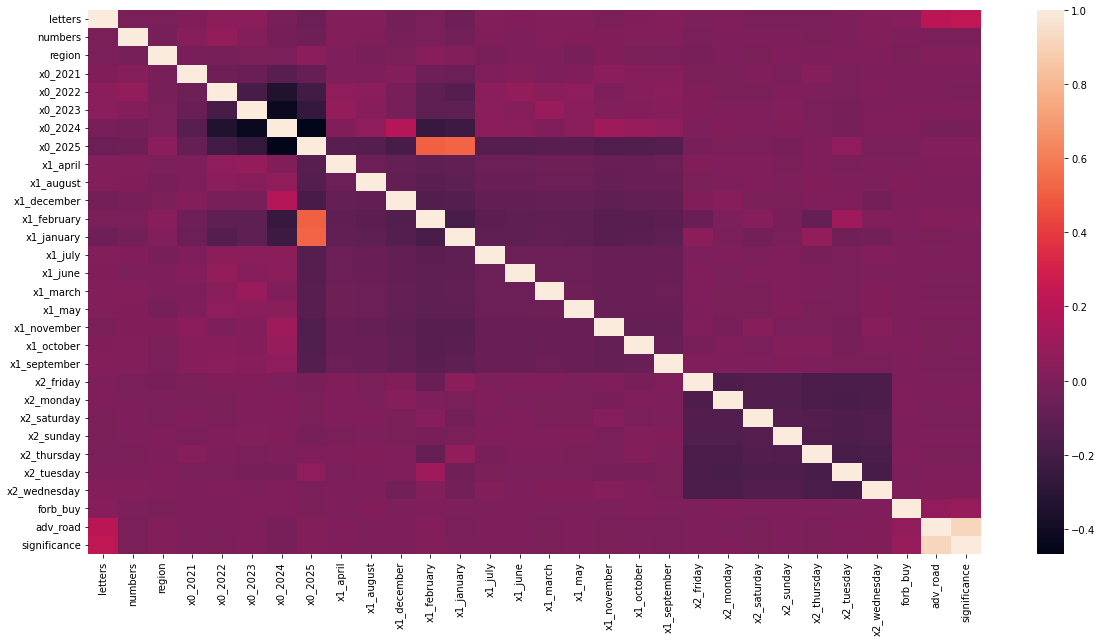

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(X_targeted.corr(), ax=ax)

In [36]:
linear_regression = Pipeline([
    ("ct", ct),
    ("ss", StandardScaler()),
    ("lr", LinearRegression())
])


In [37]:
linear_regression.fit(X, y)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tar_en', TargetEncoder(),
                                                  ['letters', 'numbers',
                                                   'region']),
                                                 ('ohe', OneHotEncoder(),
                                                  ['year', 'month',
                                                   'day_week'])])),
                ('ss', StandardScaler()), ('lr', LinearRegression())])

In [40]:
smape(linear_regression, X, y)

106.07776030103403

In [41]:
ridge = Pipeline([
    ("ct", ct),
    ("ss", StandardScaler()),
    ("ridge", Ridge(random_state=42))
])

In [42]:
params_ridge = {
    "ridge__alpha": np.arange(0.001, 0.01, 0.001)
}

In [43]:
ridge_grid = GridSearchCV(ridge, param_grid=params_ridge, scoring=smape, cv=5, verbose=1, error_score="raise", return_train_score=True, n_jobs=-1)
ridge_grid.fit(X, y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('tar_en',
                                                                         TargetEncoder(),
                                                                         ['letters',
                                                                          'numbers',
                                                                          'region']),
                                                                        ('ohe',
                                                                         OneHotEncoder(),
                                                                         ['year',
                                                                          'month',
                                                                   

In [46]:
smape(ridge_grid, X, y)

106.08364037573223

In [39]:
svr_linear = Pipeline([
    ("ct", ct),
    ("ss", StandardScaler()),
    ("svr", SVR(kernel="linear", verbose=True))
])


In [199]:
svr_linear.fit(X, y)

[LibSVM]

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tar_en', TargetEncoder(),
                                                  ['letters', 'numbers',
                                                   'region']),
                                                 ('ohe', OneHotEncoder(),
                                                  ['year', 'month',
                                                   'day_week'])])),
                ('ss', StandardScaler()),
                ('svr', SVR(kernel='linear', verbose=True))])

In [200]:
smape(svr_linear, X, y)

73.73832206281368

In [201]:
dump(svr_linear, "svr_linear")

In [193]:
svr = Pipeline([
    ("ct", ct),
    ("ss", StandardScaler()),
    ("svr", SVR(verbose=True))
])


In [194]:
svr.fit(X, y)

[LibSVM]

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tar_en', TargetEncoder(),
                                                  ['letters', 'numbers',
                                                   'region']),
                                                 ('ohe', OneHotEncoder(),
                                                  ['year', 'month',
                                                   'day_week'])])),
                ('ss', StandardScaler()), ('svr', SVR(verbose=True))])

In [195]:
smape(svr, X, y)

77.91668883800612

In [202]:
dump(svr, "svr")

In [88]:
params_svr = {
    "svr__kernel": ["linear", "poly", "rbf"],
    "svr__C": np.arange(0.1, 10.1, 0.1),
    "svr__epsilon": np.arange(0.01, 1.01, 0.01)
}

In [90]:
svr_grid = RandomizedSearchCV(svr, param_distributions=params_svr, n_iter=60, cv=3, n_jobs=-1, random_state=42, verbose=1, error_score="raise", scoring=smape)
svr_grid.fit(X, y)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[LibSVM]

RandomizedSearchCV(cv=3, error_score='raise',
                   estimator=Pipeline(steps=[('ct',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('tar_en',
                                                                               TargetEncoder(),
                                                                               ['letters',
                                                                                'numbers',
                                                                                'region']),
                                                                              ('ohe',
                                                                               OneHotEncoder(),
                                                                               ['year',
                                                                                'mon

In [91]:
svr_grid.best_params_

{'svr__kernel': 'rbf', 'svr__epsilon': 0.87, 'svr__C': 0.30000000000000004}

In [92]:
svr_grid.best_score_

78.07041625781821

In [170]:
dc_tree = Pipeline([
    ("ct", ct),
    ("decision_tree", DecisionTreeRegressor(random_state=42))
])


In [171]:
dc_tree.fit(X, y)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tar_en', TargetEncoder(),
                                                  ['letters', 'numbers',
                                                   'region']),
                                                 ('ohe', OneHotEncoder(),
                                                  ['year', 'month',
                                                   'day_week'])])),
                ('decision_tree',
                 DecisionTreeRegressor(max_depth=4, random_state=42))])

In [172]:
smape(decision_tree, X, y)

72.39319435755324

In [202]:
params_tree = {
    "decision_tree__max_depth": range(4, 31),
    "decision_tree__min_samples_split": range(2, 10)
}

In [44]:
decision_tree_grid = GridSearchCV(decision_tree, param_grid=params_tree, cv=5, n_jobs=-1, scoring=smape, error_score="raise", verbose=1)
decision_tree_grid.fit(X, y)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('tar_en',
                                                                         TargetEncoder(),
                                                                         ['letters',
                                                                          'numbers',
                                                                          'region']),
                                                                        ('ohe',
                                                                         OneHotEncoder(),
                                                                         ['year',
                                                                          'month',
                                                                   

In [45]:
decision_tree_grid.best_params_

{'decision_tree__max_depth': 4, 'decision_tree__min_samples_split': 2}

In [46]:
decision_tree_grid.best_score_

73.10897014936721

In [48]:
decision_tree = decision_tree_grid.best_estimator_

In [69]:
dec_imp = decision_tree_best.named_steps["decision_tree"].feature_importances_

In [85]:
dec_imp_sorted = sorted(np.stack((dec_imp, columns), axis=1), key=lambda x: x[0])
dec_imp_sorted = pd.DataFrame(dec_imp_sorted)

<BarContainer object of 30 artists>

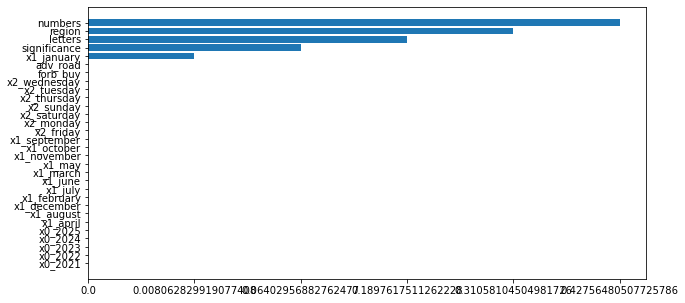

In [93]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.barh(y=dec_imp_sorted[1], width=dec_imp_sorted[0])

In [184]:
import pickle
def dump(estimator, name):
    with open(f"{name}.pkl", "wb") as f:
        pickle.dump(estimator, f)

In [186]:
def load(name):
    with open(f"{name}.pkl", "rb") as f:
        return pickle.load(f)

In [185]:
dump(decision_tree, "decision_tree")

In [187]:
decision_tree = load("decision_tree")

In [188]:
smape(decision_tree, X, y)

72.39319435755324

In [209]:
rfr = Pipeline([
    ("ct", ct),
    ("random_forest", RandomForestRegressor(random_state=42, n_estimators=20))
])


In [210]:
params_forest = {
    "random_forest__n_estimators": range(300, 501, 10),
    "random_forest__max_depth": [2]
}

In [142]:
smape(rfr, X, y)

26.61905463071348

In [161]:
rfr_grid = GridSearchCV(rfr, param_grid=params_forest, cv=5, n_jobs=-1, scoring=smape, error_score="raise", verbose=2)
rfr_grid.fit(X, y)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('tar_en',
                                                                         TargetEncoder(),
                                                                         ['letters',
                                                                          'numbers',
                                                                          'region']),
                                                                        ('ohe',
                                                                         OneHotEncoder(),
                                                                         ['year',
                                                                          'month',
                                                                   

In [162]:
print(f"best params: {rfr_grid.best_params_}")
print(f"best score: {rfr_grid.best_score_}")

best params: {'random_forest__max_depth': 2, 'random_forest__n_estimators': 350}
best score: 83.57798031792177


In [139]:
random_forest = rfr_grid.best_estimator_

In [164]:
print(f"random forest score: {smape(random_forest, X, y)}")

random forest score: 82.74527101822547


In [166]:
r_imp = random_forest.named_steps["random_forest"].feature_importances_

In [167]:
r_imp_sorted = sorted(np.stack((r_imp, columns), axis=1), key=lambda x: x[0])
r_imp_sorted = pd.DataFrame(r_imp_sorted)

<BarContainer object of 30 artists>

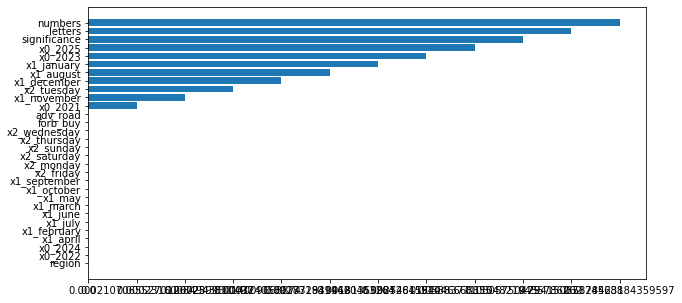

In [168]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.barh(y=r_imp_sorted[1], width=r_imp_sorted[0])

In [154]:
dump(random_forest, "random_forest")

In [191]:
cbr = Pipeline([
    ("ct", ct),
    ("cb", CatBoostRegressor(random_state=42))
])

In [192]:
params_cbr = {
    "cb__iterations": range(100, 1001, 100),
    "cb__learning_rate": np.arange(0.01, 0.51, 0.01),
    "cb__depth": range(4, 15),
    "cb__l2_leaf_reg": range(10)
}

In [ ]:
cbr_grid = RandomizedSearchCV(cbr, param_distributions=params_cbr, n_iter=100, cv=4, n_jobs=-1, random_state=42, verbose=1, error_score="raise", scoring=smape)
cbr_grid.fit(X, y)

In [33]:
cbr_grid.best_params_

{'cb__learning_rate': 0.5,
 'cb__l2_leaf_reg': 1,
 'cb__iterations': 900,
 'cb__depth': 11}

learning_rate=0.5, l2_leaf_reg=1, iterations=900, depth=11

In [ ]:
cbr.fit(X, y)

In [32]:
cbr_grid.best_score_

74.34553338443679

In [42]:
dump(cbr, "cbr")

In [31]:
smape(cbr_grid, X, y)

36.92447567378538

In [36]:
params_cbr_no_preprocessing = {
    "iterations": range(100, 1001, 100),
    "learning_rate": np.arange(0.01, 0.51, 0.01),
    "depth": range(4, 15),
    "l2_leaf_reg": range(10)
}

In [ ]:
cbr_no_preprocessing = CatBoostRegressor(random_state=42, cat_features=target_enc + ohe)
cbr_no_preprocessing_grid = RandomizedSearchCV(cbr_no_preprocessing, param_distributions=params_cbr_no_preprocessing, n_iter=100, cv=4, n_jobs=-1, random_state=42, verbose=1, error_score="raise", scoring=smape)
cbr_no_preprocessing_grid.fit(X, y)

In [41]:
dump(cbr_no_preprocessing_grid, "cbr_no_preprocessing")

In [41]:
svr = load("svr")
svr_linear = load("svr_linear")
decision_tree = load("decision_tree")
random_forest = load("random_forest")
cbr_no_preprocessing = load("cbr_no_preprocessing")
cbr = load("cbr")

In [46]:
test = wrangle("test.csv")
test

,id,plate,date,price,year,month,day_week,letters,numbers,region,dept_name,forb_buy,adv_road,significance
0,51636,P700TT790,2025-01-27 00:00:00,NaN,2025,january,monday,PTT,700,Московская область,not governmental,0,0,0
1,51637,M081TX797,2025-02-10 00:00:00,NaN,2025,february,monday,MTX,081,Москва,not governmental,0,0,0
2,51638,T333HX777,2025-02-11 00:00:00,NaN,2025,february,tuesday,THX,333,Москва,not governmental,0,0,0
3,51639,H744BH977,2025-02-03 00:00:00,NaN,2025,february,monday,HBH,744,Москва,not governmental,0,0,0
4,51640,X066EM777,2025-02-12 00:00:00,NaN,2025,february,wednesday,XEM,066,Москва,not governmental,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7690,59326,X799CC799,2023-03-13 00:00:00,NaN,2023,march,monday,XCC,799,Москва,not governmental,0,0,0
7691,59327,K077YT777,2022-10-19 00:00:00,NaN,2022,october,wednesday,KYT,077,Москва,not governmental,0,0,0
7692,59328,O200PA777,2023-10-02 19:19:30,NaN,2023,october,monday,OPA,200,Москва,not governmental,0,0,0
7693,59329,O073OO97,2025-01-12 00:00:00,NaN,2025,january,sunday,OOO,073,Москва,not governmental,0,0,0


In [47]:
X_test = test.drop(["id", "plate", "date", "price", "dept_name"], axis=1)
X_test

,year,month,day_week,letters,numbers,region,forb_buy,adv_road,significance
0,2025,january,monday,PTT,700,Московская область,0,0,0
1,2025,february,monday,MTX,081,Москва,0,0,0
2,2025,february,tuesday,THX,333,Москва,0,0,0
3,2025,february,monday,HBH,744,Москва,0,0,0
4,2025,february,wednesday,XEM,066,Москва,0,0,0
...,...,...,...,...,...,...,...,...,...
7690,2023,march,monday,XCC,799,Москва,0,0,0
7691,2022,october,wednesday,KYT,077,Москва,0,0,0
7692,2023,october,monday,OPA,200,Москва,0,0,0
7693,2025,january,sunday,OOO,073,Москва,0,0,0


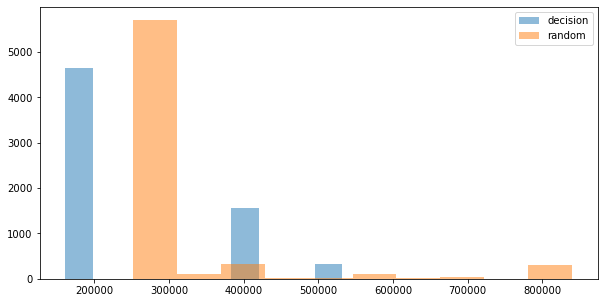

In [80]:
fig, ax = plt.subplots(figsize=(10, 5))
predict = decision_tree.predict(X_test)
predict = np.where(predict < np.quantile(predict, 0.9), predict, np.nan)
ax.hist(predict, label="decision", alpha=0.5)
predict = random_forest.predict(X_test)
predict = np.where(predict < np.quantile(predict, 0.9), predict, np.nan)
ax.hist(predict, label="random", alpha=0.5)
ax.legend()
plt.show()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.1min finished


Model:svr, Cross validation score:[77.94064121 78.51911364 78.31874933 77.77767869 77.40713812]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.2min finished


Model:svr_linear, Cross validation score:[74.58667607 75.28578054 74.96692762 74.38799607 74.10797584]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Model:decision_tree, Cross validation score:[73.19732421 72.44120144 73.69266995 74.65953084 71.5541243 ]


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Model:random_forest, Cross validation score:[83.10579582 81.97892737 86.30821134 82.60470837 83.55844943]


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   56.8s finished


Model:cbr, Cross validation score:[74.21903133 74.73601087 74.85040199 74.50675237 73.50204461]


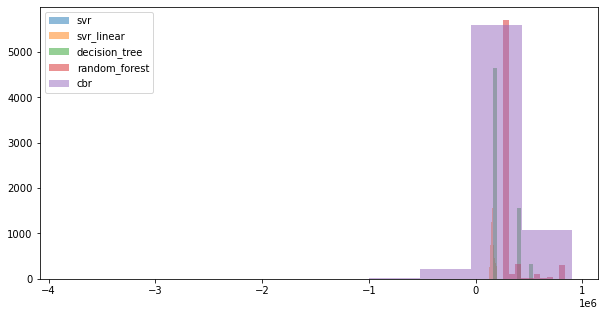

In [82]:
fig, ax = plt.subplots(figsize=(10, 5))
for name, estimator in zip(("svr", "svr_linear", "decision_tree", "random_forest", "cbr"), (svr, svr_linear, decision_tree, random_forest, cbr)):
    score = cross_val_score(estimator, cv=5, X=X, y=y, scoring=smape, verbose=1, n_jobs=-1, error_score="raise")
    print(f"Model:{name}, Cross validation score:{score}")
    prediction = estimator.predict(X_test)
    prediction = np.where(prediction < np.quantile(prediction, 0.9), prediction, np.nan)
    ax.hist(prediction, label=name, alpha=0.5)
ax.legend()
plt.show()

In [95]:
vr = VotingRegressor([
    ('svr_linear', svr_linear),
    ('decision_tree', decision_tree),
    ('random_forest', random_forest),
    ('cbr', cbr)
])

In [96]:
score_vr = cross_val_score(vr, cv=5, X=X, y=y, scoring=smape, verbose=1, n_jobs=-1, error_score="raise")
print(f"Model: Voting Regressor, Cross validation score:{score_vr}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Model: Voting Regressor, Cross validation score:[68.4854011  68.57906519 70.34952544 68.75201603 68.02852944]


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.6min finished


In [42]:
vr_no_rf = VotingRegressor([
    ('svr_linear', svr_linear),
    ('decision_tree', decision_tree),
    ('cbr', cbr)
])

In [98]:
score_vr_no_rf = cross_val_score(vr_no_rf, cv=5, X=X, y=y, scoring=smape, verbose=1, n_jobs=-1, error_score="raise")
print(f"Model: Voting Regressor without Random Forest, Cross validation score:{score_vr_no_rf}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Model: Voting Regressor without Random Forest, Cross validation score:[63.71222402 64.05645085 64.71962913 63.76652444 62.78145437]


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.4min finished


In [ ]:
vr_no_rf.fit(X, y)

In [158]:
w = [[2, 1, 1]]
for i in range(len(w[0])-1):
    v = w[0].copy()
    v[0] = 1
    v[i + 1] = 2
    w.append(v)
t = [[1, 2, 2]]
w.append(t[0])
for i in range(len(t[0])-1):
    v = t[0].copy()
    v[0] = 2
    v[i + 1] = 1
    w.append(v)
w

[[2, 1, 1], [1, 2, 1], [1, 1, 2], [1, 2, 2], [2, 1, 2], [2, 2, 1]]

In [159]:
params_vr = {
    "weights": w
}

In [ ]:
vr_grid = GridSearchCV(vr_no_rf, param_grid=params_vr, cv=5, scoring=smape, error_score="raise", verbose=1, n_jobs=-1)
vr_grid.fit(X, y)

In [162]:
print(vr_grid.best_score_)
print(vr_grid.best_params_)

65.89242986300191
{'weights': [1, 2, 1]}


In [164]:
params_vr_est = {
    "estimators": [[("svr_linear", svr_linear), ("decision_tree", decision_tree)], [("decision_tree", decision_tree), ("cbr", cbr)], [("svr_linear", svr_linear), ("cbr", cbr)]]
}

In [165]:
vr_grid_est = GridSearchCV(vr_no_rf, param_grid=params_vr_est, cv=5, scoring=smape, error_score="raise", verbose=1, n_jobs=-1)
vr_grid_est.fit(X, y)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[LibSVM]65.89242986300191
{'weights': [1, 2, 1]}


In [167]:
vr_no_rf_svr = VotingRegressor([
    ('svr', svr),
    ('decision_tree', decision_tree),
    ('cbr', cbr)
])

In [169]:
score_vr_no_rf_svr = cross_val_score(vr_no_rf_svr, cv=5, X=X, y=y, scoring=smape, verbose=1, n_jobs=-1, error_score="raise")
print(f"Model: Voting Regressor without Random Forest and with SVR, Cross validation score:{score_vr_no_rf_svr}")

Model: Voting Regressor without Random Forest and with SVR, Cross validation score:[63.9875735  64.09337634 64.99262861 63.78319908 62.86182164]


In [174]:
voting_regressor = vr_no_rf

In [175]:
dump(voting_regressor, "voting_regressor")

In [176]:
for estimator, name in zip((svr_linear, decision_tree, random_forest, cbr, voting_regressor), ("svr_linear", "decision_tree", "random_forest", "cbr", "voting_regressor")):
    pd.DataFrame(
        {
            "ID": test["id"],
            "price": estimator.predict(X_test)
        }
    ).to_csv(f"{name}.csv", index=False)

Let's try to take log(price)

In [27]:
y_log = np.log(y)
y_log

0        11.082143
1        11.512925
2        12.577636
3        13.429848
4        13.527828
           ...    
51630    11.156251
51631    14.285514
51632    13.652992
51633    11.918391
51634    10.126631
Name: price, Length: 51635, dtype: float64

In [182]:
score_vr_no_rf_log = cross_val_score(vr_no_rf, cv=5, X=X, y=y_log, scoring=smape, verbose=1, n_jobs=-1, error_score="raise")
print(f"Model: Voting Regressor without Random Forest and with log(price), Cross validation score:{score_vr_no_rf_log}")

Model: Voting Regressor without Random Forest and with log(price), Cross validation score:[4.61287555 4.68036499 4.61420448 4.55152839 4.57943326]


In [ ]:
voting_regressor_log = clone(vr_no_rf)
voting_regressor_log.fit(X, y_log)

In [188]:
pd.DataFrame(
        {
            "ID": test["id"],
            "price": np.exp(voting_regressor_log.predict(X_test))
        }
    ).to_csv(f"voting_regressor_log.csv", index=False)

In [ ]:
cbr_grid_log = RandomizedSearchCV(cbr, param_distributions=params_cbr, n_iter=100, cv=4, n_jobs=-1, random_state=42, verbose=1, error_score="raise", scoring=smape)
cbr_grid_log.fit(X, y_log)

In [195]:
cbr_grid_log.best_params_

{'cb__learning_rate': 0.5,
 'cb__l2_leaf_reg': 1,
 'cb__iterations': 900,
 'cb__depth': 11}

In [196]:
cbr_grid_log.best_score_

4.734355305133445

In [200]:
cbr_log = cbr_grid_log.best_estimator_

In [203]:
decision_tree_grid_log = GridSearchCV(decision_tree, param_grid=params_tree, cv=5, n_jobs=-1, scoring=smape, error_score="raise", verbose=1)
decision_tree_grid_log.fit(X, y_log)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('tar_en',
                                                                         TargetEncoder(),
                                                                         ['letters',
                                                                          'numbers',
                                                                          'region']),
                                                                        ('ohe',
                                                                         OneHotEncoder(),
                                                                         ['year',
                                                                          'month',
                                                                   

In [206]:
print(decision_tree_grid_log.best_params_)
print(decision_tree.named_steps["decision_tree"].get_params())

{'decision_tree__max_depth': 30, 'decision_tree__min_samples_split': 2}
{'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [207]:
decision_tree_grid_log.best_score_

5.942431886492117

In [208]:
decision_tree_log = decision_tree_grid_log.best_estimator_

In [212]:
random_forest_grid_log = GridSearchCV(rfr, param_grid=params_forest, cv=5, n_jobs=-1, scoring=smape, error_score="raise", verbose=2)
random_forest_grid_log.fit(X, y_log)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('tar_en',
                                                                         TargetEncoder(),
                                                                         ['letters',
                                                                          'numbers',
                                                                          'region']),
                                                                        ('ohe',
                                                                         OneHotEncoder(),
                                                                         ['year',
                                                                          'month',
                                                                   

In [213]:
print(random_forest_grid_log.best_params_)
print(random_forest.named_steps["random_forest"].get_params())

{'random_forest__max_depth': 2, 'random_forest__n_estimators': 490}
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 2, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [214]:
random_forest_grid_log.best_score_

5.593504533664853

In [215]:
svr_grid_log = RandomizedSearchCV(svr, param_distributions=params_svr, n_iter=60, cv=3, n_jobs=-1, random_state=42, verbose=1, error_score="raise", scoring=smape)
svr_grid.fit(X, y_log)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[LibSVM]

RandomizedSearchCV(cv=3, error_score='raise',
                   estimator=Pipeline(steps=[('ct',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('tar_en',
                                                                               TargetEncoder(),
                                                                               ['letters',
                                                                                'numbers',
                                                                                'region']),
                                                                              ('ohe',
                                                                               OneHotEncoder(),
                                                                               ['year',
                                                                                'mon

In [217]:
svr_grid.best_score_

5.234141204448778

In [216]:
print(svr_grid_log.best_params_)
print(svr.named_steps["svr"].get_params())

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [218]:
dump(cbr_log, "catboost_log")
dump(decision_tree_log, "decision_tree_log")
dump(random_forest_grid_log.best_estimator_, "random_forest_log")
dump(svr_grid.best_estimator_, "svr_log_no_grid")

In [24]:
cbr_log = load("catboost_log")
decision_tree_log = load("decision_tree_log")
random_forest_log = load("random_forest_log")
svr_log = load("svr_log_no_grid")

In [25]:
svr_log.named_steps["svr"]

SVR(C=3.8000000000000003, epsilon=0.99, kernel='linear', verbose=True)

In [28]:
print(cross_val_score(svr_log, cv=5, X=X, y=y_log, n_jobs=-1))
print(svr_log.named_steps["svr"].get_params())

[0.49444104 0.4831936  0.50002697 0.50660377 0.49184751]
{'C': 3.8000000000000003, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.99, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': True}


In [30]:
for name, estimator in zip(("svr", "decision_tree", "random_forest", "cbr"), (svr_log, decision_tree_log, random_forest_log, cbr_log)):
    score = cross_val_score(estimator, cv=5, X=X, y=y_log, scoring=smape, verbose=1, n_jobs=-1, error_score="raise")
    print(f"Model:{name}, Cross validation score:{sum(score) / 5}")


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Model:svr, Cross validation score:5.205065626422683


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Model:decision_tree, Cross validation score:5.942431886492117


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   24.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Model:random_forest, Cross validation score:5.593504533664853
Model:cbr, Cross validation score:4.678822452829896


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished


In [32]:
vr_params_log = VotingRegressor(estimators=[("cbr", cbr_log)])


In [33]:
params_vr_log = {
    "estimators": [[("cbr", cbr_log), ("svr", svr_log)], [("cbr", cbr_log), ("svr", svr_log), ("random_forest", random_forest_log), ("decision_tree", decision_tree_log)], [("cbr", cbr_log), ("svr", svr_log), ("random_forest", random_forest_log)], [("cbr", cbr_log), ("svr", svr_log), ("decision_tree", decision_tree_log)]]
}

In [ ]:
vr_params_log_grid = GridSearchCV(vr_params_log, param_grid=params_vr_log, cv=5, n_jobs=-1, scoring=smape, error_score="raise", verbose=1)
vr_params_log_grid.fit(X, y_log)

In [37]:
print(vr_params_log_grid.best_params_)
print(vr_params_log_grid.best_score_)

{'estimators': [('cbr', Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tar_en', TargetEncoder(),
                                                  ['letters', 'numbers',
                                                   'region']),
                                                 ('ohe', OneHotEncoder(),
                                                  ['year', 'month',
                                                   'day_week'])])),
                ('cb',
                 <catboost.core.CatBoostRegressor object at 0x0000018F030D1730>)])), ('svr', Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tar_en', TargetEncoder(),
                                                  ['letters', 'numbers',
                                                   'region']),
                                                 ('ohe', O

In [43]:
score_vr_no_rf_log = cross_val_score(vr_no_rf, cv=5, X=X, y=y_log, scoring=smape, verbose=1, n_jobs=-1, error_score="raise")
print(f"Model: Voting Regressor without Random Forest and with log(price), Cross validation score:{score_vr_no_rf_log}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Model: Voting Regressor without Random Forest and with log(price), Cross validation score:[4.68388408 4.72643931 4.67979033 4.60623346 4.61724876]


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  9.3min finished


In [44]:
voting_regressor_log_params = vr_params_log_grid.best_estimator_

In [48]:
for estimator, name in zip((svr_log, decision_tree_log, random_forest_log, cbr_log, voting_regressor_log_params), ("svr_log", "decision_tree_log", "random_forest_log", "cbr_log", "voting_regressor_log_params")):
    pd.DataFrame(
        {
            "ID": test["id"],
            "price": np.exp(estimator.predict(X_test))
        }
    ).to_csv(f"{name}.csv", index=False)

In [58]:
from torch.utils.data import DataLoader

In [69]:
data = DataLoader(X, batch_size=3, shuffle=True)
